# Final Results

- <b> Best Model based on CV scores - Ensemble: XGBoost </b>
- Best Mean Cross Validation Score is 0.8984774624760332
- Best parameters {'learning_rate': 0.1, 'max_depth': 4, 'min_child_weight': 1, 'n_estimators': 192, 'subsample': 0.8}
- Train score is 0.9841860823241139
- Test score is 0.8767229954557099
<p>&nbsp;</p>
- <b> Best Model based on Stacking: Voting Top 5</b>
- Best Mean Cross Validation Score is 0.8999858356957512
- Train score is 0.9491284183151113
- Test score is 0.8802582634262037

## Data PreProcessing

In [1]:
from math import sqrt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing  import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

pd.pandas.set_option('display.max_columns', None)
%matplotlib inline

### Load Datasets

In [2]:
# load dataset
# your code here
data = pd.read_csv(r'C:\Users\nabhs\OneDrive\BUAN - Semester 2\BUAN 6341 - Applied Machine Learning\Datasets\houseprice.csv')


In [3]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Types of variables



In [4]:
# we have an Id variable, that we should not use for predictions:

print('Number of House Id labels: ', len(data.Id.unique()))
print('Number of Houses in the Dataset: ', len(data))

Number of House Id labels:  1460
Number of Houses in the Dataset:  1460


#### Find categorical variables

In [5]:
# find categorical variables- hint data type = 'O'

categorical = [var for var in data.columns if data[var].dtype=='O']

print(f'There are {len(categorical)} categorical variables')
categorical

There are 43 categorical variables


['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

#### Find temporal variables

In [6]:
# make a list of the numerical variables first= Hint data type != O
numerical = [var for var in data.columns if data[var].dtype!='O']

# list of variables that contain year information= Hint variable namme has Yr or 
year_vars = [var for var in numerical if 'Yr' in var or 'Year' in var]

year_vars

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [7]:
numerical

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

#### Find discrete variables

To identify discrete variables- numerical variables with less than 20 unique values 

In [8]:
# let's visualise the values of the discrete variables
discrete = [var for var in numerical if len(data[var].unique()) < 20 and var not in year_vars]

print(f'There are {len(discrete)} discrete variables')
discrete

There are 14 discrete variables


['MSSubClass',
 'OverallQual',
 'OverallCond',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'PoolArea',
 'MoSold']

#### Continuous variables

In [9]:
# find continuous variables- hint numerical variables not in discrete and  year_years 
# Also remove the Id variable and the target variable SalePrice
# which are both also numerical

continuous = [var for var in numerical if var not in discrete and var not in [
    'Id', 'SalePrice'] and var not in year_vars]

print('There are {} numerical and continuous variables'.format(len(numerical)))
continuous

There are 38 numerical and continuous variables


['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'MiscVal']

### Separate train and test set

In [10]:
# Let's separate into train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.drop(['Id', 'SalePrice'], axis=1),
                                                    data['SalePrice'],
                                                    test_size=0.1,
                                                    random_state=0)

X_train.shape, X_test.shape

((1314, 79), (146, 79))

**Now we will move on and engineer the features of this dataset. The most important part for this course.**

### Craete New Variables

Replace 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt  with time elapsed since YrSold
So YearBuilt = YrSold-YearBuilt. 

Similarly transform 'YearRemodAdd', 'GarageYrBlt.
After making transformation drop YrSold

In [11]:
X_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
930,20,RL,73.0,8925,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,1Story,8,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,16,Unf,0,1450,1466,GasA,Ex,Y,SBrkr,1466,0,0,1466,0,0,2,0,3,1,Gd,7,Typ,0,NaN,Attchd,2007.0,Fin,3,610,TA,TA,Y,100,18,0,0,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
656,20,RL,72.0,10007,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1959,2006,Gable,CompShg,HdBoard,HdBoard,BrkFace,54.0,Gd,TA,CBlock,TA,TA,No,ALQ,806,Unf,0,247,1053,GasA,Ex,Y,SBrkr,1053,0,0,1053,1,0,1,1,3,1,Gd,5,Typ,0,NaN,Attchd,1959.0,RFn,1,312,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,8,2008,WD,Normal
45,120,RL,61.0,7658,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,TwnhsE,1Story,9,5,2005,2005,Hip,CompShg,MetalSd,MetalSd,BrkFace,412.0,Ex,TA,PConc,Ex,TA,No,GLQ,456,Unf,0,1296,1752,GasA,Ex,Y,SBrkr,1752,0,0,1752,1,0,2,0,2,1,Ex,6,Typ,1,Gd,Attchd,2005.0,RFn,2,576,TA,TA,Y,196,82,0,0,0,0,NaN,NaN,NaN,0,2,2010,WD,Normal
1348,20,RL,NaN,16196,Pave,NaN,IR3,Low,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1Story,7,5,1998,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,Gd,GLQ,1443,Unf,0,39,1482,GasA,Ex,Y,SBrkr,1494,0,0,1494,1,0,2,0,3,1,Gd,5,Typ,1,Fa,Attchd,1998.0,RFn,2,514,TA,TA,Y,402,25,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal
55,20,RL,100.0,10175,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1964,1964,Gable,CompShg,HdBoard,Plywood,BrkFace,272.0,TA,TA,CBlock,TA,TA,No,BLQ,490,Unf,0,935,1425,GasA,Gd,Y,SBrkr,1425,0,0,1425,0,0,2,0,3,1,TA,7,Typ,1,Gd,Attchd,1964.0,RFn,2,576,TA,TA,Y,0,0,0,407,0,0,NaN,NaN,NaN,0,7,2008,WD,Normal


In [12]:
# function to calculate elapsed time

def elapsed_years(df, var):
    # capture difference between year variable and
    # year the house was sold
    
    df[var] = df['YrSold'] - df[var]
    return df

In [13]:
for var in ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']:
    X_train = elapsed_years(X_train, var)
    X_test = elapsed_years(X_test, var)

In [14]:
# drop YrSold
X_train.drop('YrSold', axis=1, inplace=True)
X_test.drop('YrSold', axis=1, inplace=True)

In [15]:
year_vars.remove('YrSold')

In [16]:
# capture the column names for use later in the notebook
final_columns = X_train.columns
final_columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

### Feature Engineering Pipeline

In [17]:
# I will treat discrete variables as if they were categorical
# to treat discrete as categorical using Feature-engine
# we need to re-cast them as object

X_train[discrete] = X_train[discrete].astype('O')
X_test[discrete] = X_test[discrete].astype('O')

In [18]:
# import relevant modules for feature engineering
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from feature_engine import missing_data_imputers as mdi
from feature_engine import categorical_encoders as ce
from feature_engine.variable_transformers import YeoJohnsonTransformer
from sklearn.preprocessing import StandardScaler
from feature_engine.discretisers import DecisionTreeDiscretiser

In [19]:
house_preprocess = Pipeline([
    
    # missing data imputation 
    ('missing_ind', mdi.AddNaNBinaryImputer(
       variables=['LotFrontage', 'MasVnrArea',  'GarageYrBlt'])),
    ('imputer_num', mdi.MeanMedianImputer(imputation_method='mean',
                                          variables=['LotFrontage', 'MasVnrArea',  'GarageYrBlt'])),
    ('imputer_cat', mdi.CategoricalVariableImputer(variables=categorical)),

    # categorical encoding 
     ('rare_label_enc', ce.RareLabelCategoricalEncoder(
         tol=0.01,n_categories=6, variables=categorical+discrete)),
    ('categorical_enc', ce.MeanCategoricalEncoder(variables = categorical + discrete)),
     
    # Transforming Numerical Variables
    ('yjt', YeoJohnsonTransformer(variables = ['LotFrontage','MasVnrArea', 'GarageYrBlt'])),

    
    # discretisation and encoding
    ('treeDisc',  DecisionTreeDiscretiser(cv=2, scoring='neg_mean_squared_error',
                                   regression=True,
                                   param_grid={'max_depth': [1,2,3,4,5,6]})),

    # feature Scaling
    ('scaler', StandardScaler()),
    
    

])

In [20]:
house_preprocess.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('missing_ind',
                 AddNaNBinaryImputer(variables=['LotFrontage', 'MasVnrArea',
                                                'GarageYrBlt'])),
                ('imputer_num',
                 MeanMedianImputer(imputation_method='mean',
                                   variables=['LotFrontage', 'MasVnrArea',
                                              'GarageYrBlt'])),
                ('imputer_cat',
                 CategoricalVariableImputer(variables=['MSZoning', 'Street',
                                                       'Alley', 'LotShape',
                                                       'LandContour',
                                                       'Utilities', '...
                                                    'Utilities', 'LotConfig',
                                                    'LandSlope', 'Neighborhood',
                                                    'Condition1', 'Condition2',
    

In [21]:
# Apply Transformations
X_train=house_preprocess.transform(X_train)
X_test=house_preprocess.transform(X_test)

## <span class="mark">DO NOT CHANGE STEPS BEFORE THIS POINT</span>

## Simple Models

### Linear Regression

In [22]:
# Train a linear regression model, report the coefficients and model performance 

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

lr = LinearRegression().fit(X_train, y_train)
cv_scores = cross_val_score(lr, X_train, y_train)

#### Results

In [23]:
x_lrtrain= lr.predict(X_train)
x_lrtest = lr.predict(X_test)

# check model performance:

print('train mse: {}'.format(mean_squared_error(y_train, x_lrtrain)))
print('train rmse: {}'.format(sqrt(mean_squared_error(y_train, x_lrtrain))))
print('train r2: {}'.format(r2_score(y_train, x_lrtrain)))
print()
print('test mse: {}'.format(mean_squared_error(y_test, x_lrtest)))
print('test rmse: {}'.format(sqrt(mean_squared_error(y_test, x_lrtest))))
print('test r2: {}'.format(r2_score(y_test, x_lrtest)))

#print("Best parameters: {}".format(lr.best_params_))
print("Mean Cross-validation scores: {}".format(cv_scores))
print('Train score: {:.4f}'.format(lr.score(X_train, y_train)))
print('Test score: {:.4f}'.format(lr.score(X_test, y_test)))

train mse: 552937051.405446
train rmse: 23514.61357125492
train r2: 0.9114426745730106

test mse: 861097775.8563162
test rmse: 29344.467551078793
test r2: 0.8746968378820517
Mean Cross-validation scores: [ 8.68312903e-01 -6.26561684e+21  8.76203279e-01  8.98626806e-01
  8.92290590e-01]
Train score: 0.9114
Test score: 0.8747


### Ridge Regression

In [24]:
# Train a Ridge regression model, report the coefficients, the best parameters, and model performance 
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
ridge = Ridge()

#define a list of parameters
#param_ridge = {'alpha':[0.001, 0.01, 0.1, 1, 10, 100] }
param_ridge = {'alpha':[1, 1e3, 1e4] }
grid_ridge = GridSearchCV(ridge, param_ridge, cv=10, return_train_score = True,scoring='r2')
grid_ridge.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1, 1000.0, 10000.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=0)

#### Results

In [25]:
x_gridtrain= grid_ridge.predict(X_train)
x_gridtest = grid_ridge.predict(X_test)

# check model performance:

print('train mse: {}'.format(mean_squared_error(y_train, x_gridtrain)))
print('train rmse: {}'.format(sqrt(mean_squared_error(y_train, x_gridtrain))))
print('train r2: {}'.format(r2_score(y_train, x_gridtrain)))
print()
print('test mse: {}'.format(mean_squared_error(y_test, x_gridtest)))
print('test rmse: {}'.format(sqrt(mean_squared_error(y_test, x_gridtest))))
print('test r2: {}'.format(r2_score(y_test, x_gridtest)))

print("Best parameters: {}".format(grid_ridge.best_params_))
print("Cross-validation scores: {}".format(grid_ridge.best_score_))
print('Train score: {:.4f}'.format(grid_ridge.score(X_train, y_train)))
print('Test score: {:.4f}'.format(grid_ridge.score(X_test, y_test)))

train mse: 552540520.7585117
train rmse: 23506.1804800038
train r2: 0.911506182152134

test mse: 858035459.791463
test rmse: 29292.242314159957
test r2: 0.8751424526508844
Best parameters: {'alpha': 1}
Cross-validation scores: 0.8843424460850325
Train score: 0.9115
Test score: 0.8751


### Lasso

In [26]:
# Train a Lasso regression model, report the coefficients, the best parameters, and model performance 

# YOUR CODE HERE

from sklearn.linear_model import Lasso
lasso = Lasso(random_state=0)

#define a list of parameters
#param_lasso = {'alpha':[0.001, 0.01, 0.1, 1, 10, 100] }
param_lasso = {'alpha':[1, 1e4, 1e5] }

grid_lasso = GridSearchCV(lasso, param_lasso, cv=10, return_train_score = True,scoring='r2')
grid_lasso.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=0,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1, 10000.0, 100000.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=0)

#### Results

In [27]:
x_lassotrain= grid_lasso.predict(X_train)
x_lassotest = grid_lasso.predict(X_test)

# check model performance:

print('train mse: {}'.format(mean_squared_error(y_train, x_lassotrain)))
print('train rmse: {}'.format(sqrt(mean_squared_error(y_train, x_lassotrain))))
print('train r2: {}'.format(r2_score(y_train, x_lassotrain)))
print()
print('test mse: {}'.format(mean_squared_error(y_test, x_lassotest)))
print('test rmse: {}'.format(sqrt(mean_squared_error(y_test, x_lassotest))))
print('test r2: {}'.format(r2_score(y_test, x_lassotest)))

print("Best parameters: {}".format(grid_lasso.best_params_))
print("Cross-validation scores: {}".format(grid_lasso.best_score_))
print('Train score: {:.4f}'.format(grid_lasso.score(X_train, y_train)))
print('Test score: {:.4f}'.format(grid_lasso.score(X_test, y_test)))

train mse: 552539222.3512008
train rmse: 23506.152861563733
train r2: 0.9115063901025299

test mse: 857849072.1153543
test rmse: 29289.060621934503
test r2: 0.87516957496597
Best parameters: {'alpha': 1}
Cross-validation scores: 0.8843049751400216
Train score: 0.9115
Test score: 0.8752


## Linear Regression with SGD

In [28]:
from sklearn.linear_model import SGDRegressor

In [29]:
# create pipeline
reg_sgd_pipe = Pipeline([

    # feature Scaling
    ('scaler', MinMaxScaler()),
    # regression
    ('sgd_reg', SGDRegressor(max_iter=1000, tol = 1e-6))
])

param_sgd = {'sgd_reg__eta0':[0.01, 0.05, 0.1 ,0.5], 
             'sgd_reg__penalty' :['l1','l2'],#lasso,ridge
             'sgd_reg__alpha' :[0.1,0.01,0.001] }

grid_linearsgd = GridSearchCV(reg_sgd_pipe, 
                              param_sgd,cv=5, 
                              n_jobs=-1, 
                              return_train_score = True,
                              scoring='r2')

# let's fit the pipeline
grid_linearsgd.fit(X_train, y_train)

# let's get the predictions
X_train_preds = grid_linearsgd.predict(X_train)
X_test_preds = grid_linearsgd.predict(X_test)

### Results

In [30]:
# check model performance:

print('train mse: {}'.format(mean_squared_error(y_train, X_train_preds)))
print('train rmse: {}'.format(sqrt(mean_squared_error(y_train, X_train_preds))))
print('train r2: {}'.format(r2_score(y_train, X_train_preds)))
print()
print('test mse: {}'.format(mean_squared_error(y_test, X_test_preds)))
print('test rmse: {}'.format(sqrt(mean_squared_error(y_test, X_test_preds))))
print('test r2: {}'.format(r2_score(y_test, X_test_preds)))

print("Best parameters: {}".format(grid_linearsgd.best_params_))
print('Train score: {:.4f}'.format(grid_linearsgd.score(X_train, y_train)))
print('Test score: {:.4f}'.format(grid_linearsgd.score(X_test, y_test)))

train mse: 594505167.346368
train rmse: 24382.476645049166
train r2: 0.9047852057681796

test mse: 957543094.9385668
test rmse: 30944.19323457257
test r2: 0.8606625391167776
Best parameters: {'sgd_reg__alpha': 0.01, 'sgd_reg__eta0': 0.05, 'sgd_reg__penalty': 'l1'}
Train score: 0.9048
Test score: 0.8607


## Polynomial Regression

In [31]:
#apply polynomial regression in pipeline
#pipe_poly = make_pipeline(PolynomialFeatures(),MinMaxScaler(), LinearRegression())
pipe_poly=Pipeline([ 
    ('polynomialfeatures', PolynomialFeatures()),
    ('scaler',MinMaxScaler()),
    ('norm_reg', LinearRegression())
    
])
#define a list of parameters
param_poly = {'polynomialfeatures__degree':range(1,3)}

grid_poly = GridSearchCV(pipe_poly, param_poly,cv=5, n_jobs=-1, return_train_score = True,scoring='r2')


grid_poly.fit(X_train, y_train)

# let's get the predictions
X_train_preds = grid_poly.predict(X_train)
X_test_preds = grid_poly.predict(X_test)


### Results

In [32]:
x_polytrain= grid_lasso.predict(X_train)
x_polytest = grid_lasso.predict(X_test)

# check model performance:

print('train mse: {}'.format(mean_squared_error(y_train, x_polytrain)))
print('train rmse: {}'.format(sqrt(mean_squared_error(y_train, x_polytrain))))
print('train r2: {}'.format(r2_score(y_train, x_polytrain)))
print()
print('test mse: {}'.format(mean_squared_error(y_test, x_polytest)))
print('test rmse: {}'.format(sqrt(mean_squared_error(y_test, x_polytest))))
print('test r2: {}'.format(r2_score(y_test, x_polytest)))

print("Best parameters: {}".format(grid_poly.best_params_))
print("Cross-validation scores: {}".format(grid_poly.best_score_))
print('Train score: {:.4f}'.format(grid_poly.score(X_train, y_train)))
print('Test score: {:.4f}'.format(grid_poly.score(X_test, y_test)))

train mse: 552539222.3512008
train rmse: 23506.152861563733
train r2: 0.9115063901025299

test mse: 857849072.1153543
test rmse: 29289.060621934503
test r2: 0.87516957496597
Best parameters: {'polynomialfeatures__degree': 2}
Cross-validation scores: -9.790048692779738e+22
Train score: 1.0000
Test score: -312603571663290826752.0000


In [33]:
print('train mse: {}'.format(mean_squared_error(y_train, X_train_preds)))
print('train rmse: {}'.format(sqrt(mean_squared_error(y_train, X_train_preds))))
print('train r2: {}'.format(r2_score(y_train, X_train_preds)))
print()
print('test mse: {}'.format(mean_squared_error(y_test, X_test_preds)))
print('test rmse: {}'.format(sqrt(mean_squared_error(y_test, X_test_preds))))
print('test r2: {}'.format(r2_score(y_test, X_test_preds)))

train mse: 27597.318873668188
train rmse: 166.12440782036873
train r2: 0.9999955800669494

test mse: 2.1482477834886397e+30
test rmse: 1465690207202272.2
test r2: -3.126035716632908e+20


## ElasticNet 

In [34]:
from sklearn.linear_model import ElasticNet

elasticnet = ElasticNet().fit(X_train, y_train)

#define a list of parameters
param_elasticnet = {'alpha':[1, 1e4, 1e5], 
                    'l1_ratio' :[0.2,0.4,0.6,0.8]}

grid_elasticnet = GridSearchCV(elasticnet , param_elasticnet, cv=5, return_train_score = True,scoring='r2')
grid_elasticnet.fit(X_train, y_train)

x_elastictrain_predict = grid_elasticnet.predict(X_train)
x_elastictest_predict = grid_elasticnet.predict(X_test)


### Results

In [35]:
print('train mse: {}'.format(mean_squared_error(y_train, x_elastictrain_predict)))
print('train rmse: {}'.format(sqrt(mean_squared_error(y_train, x_elastictrain_predict))))
print('train r2: {}'.format(r2_score(y_train, x_elastictrain_predict)))
print()
print('test mse: {}'.format(mean_squared_error(y_test, x_elastictest_predict)))
print('test rmse: {}'.format(sqrt(mean_squared_error(y_test, x_elastictest_predict))))
print('test r2: {}'.format(r2_score(y_test, x_elastictest_predict)))
print()
print('Best parameters: ', grid_elasticnet.best_params_)
print('Best cross-validation score:', grid_elasticnet.score(X_test, y_test))
print("Training set score: {:.2f}".format(grid_elasticnet.score(X_train, y_train)))
print("Test set score: {:.2f}".format(grid_elasticnet.score(X_test, y_test)))


train mse: 580812656.1496782
train rmse: 24100.055106776796
train r2: 0.9069781717972707

test mse: 908630644.7418916
test rmse: 30143.500870699998
test r2: 0.8677800638026185

Best parameters:  {'alpha': 1, 'l1_ratio': 0.8}
Best cross-validation score: 0.8677800638026185
Training set score: 0.91
Test set score: 0.87


## Tune Multiple Models with one GridSearch

### Model - Linear Regression with Model Parameter - Ridge *GridSearch

In [36]:
model_linear = Pipeline([("regressor", LinearRegression())] )

In [37]:
model_parm_gd1 = [{ 'regressor': [Ridge()]}]

In [38]:
from sklearn import svm
grid_search_linear = GridSearchCV(svm.SVC(gamma='auto'),{
    'C':[30],
    'kernel':['linear']
    
},cv=5,return_train_score=False,scoring='r2')

In [39]:
grid_search_linear = GridSearchCV(model_linear,model_parm_gd1,scoring='r2')

In [40]:
grid_search_linear.fit(X_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('regressor',
                                        LinearRegression(copy_X=True,
                                                         fit_intercept=True,
                                                         n_jobs=None,
                                                         normalize=False))],
                                verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'regressor': [Ridge(alpha=1.0, copy_X=True,
                                              fit_intercept=True, max_iter=None,
                                              normalize=False,
                                              random_state=None, solver='auto',
                                              tol=0.001)]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='r2', verbose=0)

#### Results

In [41]:
x_lrtrain= grid_search_linear.predict(X_train)
x_lrtest = grid_search_linear.predict(X_test)

# check model performance:

print('train mse: {}'.format(mean_squared_error(y_train, x_lrtrain)))
print('train rmse: {}'.format(sqrt(mean_squared_error(y_train, x_lrtrain))))
print('train r2: {}'.format(r2_score(y_train, x_lrtrain)))
print()
print('test mse: {}'.format(mean_squared_error(y_test, x_lrtest)))
print('test rmse: {}'.format(sqrt(mean_squared_error(y_test, x_lrtest))))
print('test r2: {}'.format(r2_score(y_test, x_lrtest)))
print()

print("Best parameters: {}".format(grid_search_linear.best_params_))
print("Cross-validation scores: {}".format(grid_search_linear.best_score_))
print('Train score: {:.4f}'.format(grid_search_linear.score(X_train, y_train)))
print('Test score: {:.4f}'.format(grid_search_linear.score(X_test, y_test)))

train mse: 552540520.7585117
train rmse: 23506.1804800038
train r2: 0.911506182152134

test mse: 858035459.791463
test rmse: 29292.242314159957
test r2: 0.8751424526508844

Best parameters: {'regressor': Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)}
Cross-validation scores: 0.8818969790895617
Train score: 0.9115
Test score: 0.8751


## Linear Regression with Model Parameter - Lasso *GridSearchCV

In [42]:
model_linear2 = Pipeline([("regressor", LinearRegression())] )

In [43]:
model_parm_gd2 = [{ 'regressor': [Lasso(random_state=0)]}]

In [44]:
grid_search_linear2 = GridSearchCV(svm.SVC(gamma='auto'),{
    'C':[1,10,20,30],
    'kernel':['polynomial']
    
},cv=5,return_train_score=False,scoring='r2')

In [45]:
grid_search_linear2 = GridSearchCV(model_linear2,model_parm_gd2,scoring='r2')

In [46]:
grid_search_linear2.fit(X_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('regressor',
                                        LinearRegression(copy_X=True,
                                                         fit_intercept=True,
                                                         n_jobs=None,
                                                         normalize=False))],
                                verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'regressor': [Lasso(alpha=1.0, copy_X=True,
                                              fit_intercept=True, max_iter=1000,
                                              normalize=False, positive=False,
                                              precompute=False, random_state=0,
                                              selection='cyclic', tol=0.0001,
                                              warm_start=False)]}],
             pre_disp

#### Results

In [47]:
x_lrtrain= grid_search_linear2.predict(X_train)
x_lrtest = grid_search_linear2.predict(X_test)

# check model performance:

print('train mse: {}'.format(mean_squared_error(y_train, x_lrtrain)))
print('train rmse: {}'.format(sqrt(mean_squared_error(y_train, x_lrtrain))))
print('train r2: {}'.format(r2_score(y_train, x_lrtrain)))
print()
print('test mse: {}'.format(mean_squared_error(y_test, x_lrtest)))
print('test rmse: {}'.format(sqrt(mean_squared_error(y_test, x_lrtest))))
print('test r2: {}'.format(r2_score(y_test, x_lrtest)))
print()
print("Best parameters: {}".format(grid_search_linear2.best_params_))
print("Cross-validation scores: {}".format(grid_search_linear2.best_score_))
print('Train score: {:.4f}'.format(grid_search_linear2.score(X_train, y_train)))
print('Test score: {:.4f}'.format(grid_search_linear2.score(X_test, y_test)))

train mse: 552539222.3512008
train rmse: 23506.152861563733
train r2: 0.9115063901025299

test mse: 857849072.1153543
test rmse: 29289.060621934503
test r2: 0.87516957496597

Best parameters: {'regressor': Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=0,
      selection='cyclic', tol=0.0001, warm_start=False)}
Cross-validation scores: 0.881849542095595
Train score: 0.9115
Test score: 0.8752


## Pipeline - RandomForest Regressor with Model Parameter - Linear Regression *GridSearchCV

In [48]:
from sklearn.ensemble import RandomForestRegressor

In [49]:
model_rf = Pipeline([('regressor', RandomForestRegressor(random_state = 42))])

In [50]:
model_parm_rf = [{ 'regressor': [LinearRegression()]}]

In [51]:
from sklearn import svm

In [52]:
grid_rf = GridSearchCV(svm.SVC(gamma='auto'),{
    'C':[30],
    'kernel':['linear']
    
},cv=5,return_train_score=False,scoring='r2')

In [53]:
grid_rf = GridSearchCV(model_rf, model_parm_rf)

In [54]:
grid_rf.fit(X_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('regressor',
                                        RandomForestRegressor(bootstrap=True,
                                                              ccp_alpha=0.0,
                                                              criterion='mse',
                                                              max_depth=None,
                                                              max_features='auto',
                                                              max_leaf_nodes=None,
                                                              max_samples=None,
                                                              min_impurity_decrease=0.0,
                                                              min_impurity_split=None,
                                                              min_samples_leaf=1,
                                               

### Results

In [55]:
x_rftrain= grid_rf.predict(X_train)
x_rftest = grid_rf.predict(X_test)

# check model performance:

print('train mse: {}'.format(mean_squared_error(y_train, x_rftrain)))
print('train rmse: {}'.format(sqrt(mean_squared_error(y_train, x_rftrain))))
print('train r2: {}'.format(r2_score(y_train, x_rftrain)))
print()
print('test mse: {}'.format(mean_squared_error(y_test, x_rftest)))
print('test rmse: {}'.format(sqrt(mean_squared_error(y_test, x_rftest))))
print('test r2: {}'.format(r2_score(y_test, x_rftest)))

print("Best parameters: {}".format(grid_rf.best_params_))
print("Cross-validation scores: {}".format(grid_rf.best_score_))
print('Train score: {:.4f}'.format(grid_rf.score(X_train, y_train)))
print('Test score: {:.4f}'.format(grid_rf.score(X_test, y_test)))

train mse: 552937051.405446
train rmse: 23514.61357125492
train r2: 0.9114426745730106

test mse: 861097775.8563162
test rmse: 29344.467551078793
test r2: 0.8746968378820517
Best parameters: {'regressor': LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)}
Cross-validation scores: -1.2531233677405604e+21
Train score: 0.9114
Test score: 0.8747


## KNN Regressor

In [56]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
knnreg = KNeighborsRegressor().fit(X_train, y_train)
print("Training set score: {:.2f}".format(knnreg.score(X_train, y_train)))
print("Test set score: {:.2f}".format(knnreg.score(X_test, y_test)))

Training set score: 0.88
Test set score: 0.59


In [57]:
pipe_knn = make_pipeline(MinMaxScaler(), KNeighborsRegressor())
knnreg = pipe_knn.fit(X_train, y_train)
print("Training set score: {:.2f}".format(knnreg.score(X_train, y_train)))
print("Test set score: {:.2f}".format(knnreg.score(X_test, y_test)))

Training set score: 0.86
Test set score: 0.71


In [58]:
    from sklearn.model_selection import GridSearchCV

    pipe_knn=Pipeline([ 
        ('scaler',MinMaxScaler()),
        ('knnreg', KNeighborsRegressor())

    ])
    # define a list of parameters
    #param_knn = {'n_neighbors': [5, 10, 15, 20, 25, 30]}
    param_knn = {'knnreg__n_neighbors': range(1,25)}

    #apply grid search
    grid_knn = GridSearchCV(pipe_knn, param_knn, cv=5, return_train_score=True,scoring='r2')
    grid_knn.fit(X_train, y_train)


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        MinMaxScaler(copy=True,
                                                     feature_range=(0, 1))),
                                       ('knnreg',
                                        KNeighborsRegressor(algorithm='auto',
                                                            leaf_size=30,
                                                            metric='minkowski',
                                                            metric_params=None,
                                                            n_jobs=None,
                                                            n_neighbors=5, p=2,
                                                            weights='uniform'))],
                                verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'knnreg__n_nei

### Results

In [59]:
x_knntrain= grid_knn.predict(X_train)
x_knntest = grid_knn.predict(X_test)

# check model performance:

print('train mse: {}'.format(mean_squared_error(y_train, x_knntrain)))
print('train rmse: {}'.format(sqrt(mean_squared_error(y_train, x_knntrain))))
print('train r2: {}'.format(r2_score(y_train, x_knntrain)))
print()
print('test mse: {}'.format(mean_squared_error(y_test, x_knntest)))
print('test rmse: {}'.format(sqrt(mean_squared_error(y_test, x_knntest))))
print('test r2: {}'.format(r2_score(y_test, x_knntest)))
print()
print('train score: ', grid_knn.score(X_train, y_train))
print('test score: ', grid_knn.score(X_test, y_test))

#find best parameters
print('Best parameters: ', grid_knn.best_params_)
print('Best cross-validation score:', grid_knn.best_score_)

train mse: 926540858.0310757
train rmse: 30439.13366098115
train r2: 0.8516070137143069

test mse: 1657648286.6700912
test rmse: 40714.227079364915
test r2: 0.7587863099604379

train score:  0.8516070137143069
test score:  0.7587863099604379
Best parameters:  {'knnreg__n_neighbors': 6}
Best cross-validation score: 0.78587417331835


## ElasticNet with GridSearch

In [60]:
elasticnet = ElasticNet()

#define a list of parameters
param_elasticnet = {'alpha':[0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10], 'l1_ratio' :[0.2,0.4,0.6,0.8]}

grid_elasticnet = GridSearchCV(elasticnet , param_elasticnet, cv=5, return_train_score = True,scoring='r2')
grid_elasticnet.fit(X_train, y_train)

grid_elasticnet_train_score = grid_elasticnet.score(X_train, y_train)
grid_elasticnet_test_score = grid_elasticnet.score(X_test, y_test)

C:\Users\nabhs\Anaconda3\envs\buan6341_2020\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 275261918430.7595, tolerance: 657118734.8147435
  positive)
C:\Users\nabhs\Anaconda3\envs\buan6341_2020\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 270472843507.742, tolerance: 655974723.0327224
  positive)
C:\Users\nabhs\Anaconda3\envs\buan6341_2020\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 269415475236.1935, tolerance: 635955900.9288123
  positive)
C:\Users\nabhs\Anaconda3\envs\buan6341_2020\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did n

C:\Users\nabhs\Anaconda3\envs\buan6341_2020\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 274841772404.84204, tolerance: 657118734.8147435
  positive)
C:\Users\nabhs\Anaconda3\envs\buan6341_2020\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 269830678356.61826, tolerance: 655974723.0327224
  positive)
C:\Users\nabhs\Anaconda3\envs\buan6341_2020\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 269256329279.5095, tolerance: 635955900.9288123
  positive)
C:\Users\nabhs\Anaconda3\envs\buan6341_2020\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective di

C:\Users\nabhs\Anaconda3\envs\buan6341_2020\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 221086170647.84283, tolerance: 655974723.0327224
  positive)
C:\Users\nabhs\Anaconda3\envs\buan6341_2020\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 204650042677.63684, tolerance: 635955900.9288123
  positive)
C:\Users\nabhs\Anaconda3\envs\buan6341_2020\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 232586340970.15808, tolerance: 642749145.1567798
  positive)
C:\Users\nabhs\Anaconda3\envs\buan6341_2020\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective d

### Results

In [61]:
# let's get the predictions
x_elastictrain= grid_elasticnet.predict(X_train)
x_elastictest = grid_elasticnet.predict(X_test)

# check model performance:

print('train mse: {}'.format(mean_squared_error(y_train, x_elastictrain)))
print('train rmse: {}'.format(sqrt(mean_squared_error(y_train, x_elastictrain))))
print('train r2: {}'.format(r2_score(y_train, x_elastictrain)))
print()
print('test mse: {}'.format(mean_squared_error(y_test, x_elastictest)))
print('test rmse: {}'.format(sqrt(mean_squared_error(y_test, x_elastictest))))
print('test r2: {}'.format(r2_score(y_test, x_elastictest)))

print('Training set score: ', grid_elasticnet_train_score)
print('Test score: ', grid_elasticnet_test_score)

#find best parameters
print('Best parameters: ', grid_elasticnet.best_params_)
print('Best cross-validation score:', grid_elasticnet.best_score_)

train mse: 560460520.2398213
train rmse: 23674.04739878294
train r2: 0.9102377304004107

test mse: 872749277.5992303
test rmse: 29542.33026691074
test r2: 0.8730013625797748
Training set score:  0.9102377304004107
Test score:  0.8730013625797748
Best parameters:  {'alpha': 0.1, 'l1_ratio': 0.2}
Best cross-validation score: 0.8840700291378194


## Decision Tree Regression

In [62]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
decisiontree = DecisionTreeRegressor(random_state = 0)


param_DTree = {"max_depth": range(1,30),
               "max_leaf_nodes": range(2,20),
              "min_samples_split":range(2,30)}

grid_dtree = GridSearchCV(decisiontree,param_DTree,cv=5,scoring='r2')
grid_dtree.fit(X_train,y_train)


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': range(1, 30),
                         'max_leaf_nodes': range(2, 20),
                         'min_samples_split': range(2, 30)},
             pre_dispatch='2*n_jo

### Results

In [63]:
# let's get the predictions
x_dtreetrain= grid_dtree.predict(X_train)
x_dtreetest = grid_dtree.predict(X_test)

print('train mse: {}'.format(mean_squared_error(y_train, x_dtreetrain)))
print('train rmse: {}'.format(sqrt(mean_squared_error(y_train, x_dtreetrain))))
print('train r2: {}'.format(r2_score(y_train, x_dtreetrain)))
print()
print('test mse: {}'.format(mean_squared_error(y_test, x_dtreetest)))
print('test rmse: {}'.format(sqrt(mean_squared_error(y_test, x_dtreetest))))
print('test r2: {}'.format(r2_score(y_test, x_dtreetest)))
print()
print('Best parameters: ', grid_dtree.best_params_)
print("Accuracy on training set: {:.4f}".format(grid_dtree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(grid_dtree.score(X_test, y_test)))

train mse: 1105977258.816959
train rmse: 33256.23638984061
train r2: 0.8228688278802175

test mse: 1548654925.2624905
test rmse: 39352.953196202325
test r2: 0.7746465446714791

Best parameters:  {'max_depth': 6, 'max_leaf_nodes': 19, 'min_samples_split': 29}
Accuracy on training set: 0.8229
Accuracy on test set: 0.775


## SVM 

In [64]:
from sklearn.svm import SVC
svc_kernel = SVC()

#define a list of parameters
param_svc_kernel = [{'C': [1,10,100,1000,10000],
                    'gamma':['auto'],
                   'kernel':['rbf']},
                    {'C': [1,10,100,1000,10000],
                    'gamma':['auto'],
                   'kernel':['poly']},
                    {'C': [1,10,100,1000,10000],
                    'gamma':['auto'],
                   'kernel':['sigmoid',]}]


#apply grid search
grid_svc_kernel = GridSearchCV(svc_kernel, param_svc_kernel, cv=5, n_jobs=2,scoring='r2')
grid_svc_kernel.fit(X_train, y_train)


C:\Users\nabhs\Anaconda3\envs\buan6341_2020\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=2,
             param_grid=[{'C': [1, 10, 100, 1000, 10000], 'gamma': ['auto'],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000, 10000], 'gamma': ['auto'],
                          'kernel': ['poly']},
                         {'C': [1, 10, 100, 1000, 10000], 'gamma': ['auto'],
                          'kernel': ['sigmoid']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='r2', verbose=0)

### Results

In [65]:
# let's get the predictions
x_svctrain= grid_svc_kernel.predict(X_train)
x_svctest = grid_svc_kernel.predict(X_test)

print('train mse: {}'.format(mean_squared_error(y_train, x_svctrain)))
print('train rmse: {}'.format(sqrt(mean_squared_error(y_train, x_svctrain))))
print('train r2: {}'.format(r2_score(y_train, x_svctrain)))
print()
print('test mse: {}'.format(mean_squared_error(y_test, x_svctest)))
print('test rmse: {}'.format(sqrt(mean_squared_error(y_test, x_svctest))))
print('test r2: {}'.format(r2_score(y_test, x_svctest)))
print()
print('Best parameters: ', grid_svc_kernel.best_params_)
print('train score: ', grid_svc_kernel.score(X_train, y_train))
print('test score: ', grid_svc_kernel.score(X_train, y_train))

train mse: 61834.09436834094
train rmse: 248.66462226931466
train r2: 0.9999900967714073

test mse: 1296973682.7054794
test rmse: 36013.520831841466
test r2: 0.8112700924524573

Best parameters:  {'C': 100, 'gamma': 'auto', 'kernel': 'poly'}
train score:  0.9999900967714073
test score:  0.9999900967714073


# Ensemble

## Bagging

### With Descision Tree Regressor

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor

In [67]:
bag_dtree1 = BaggingRegressor(base_estimator=DecisionTreeRegressor(), bootstrap=True, random_state=0, oob_score=True)

bag_dtree1_param = {
                 'base_estimator__max_depth': range(1,10),
                 'max_samples':  [0.8,1],
                 'n_estimators': range(1,80,5)}
bag_dtree1_grid = GridSearchCV(bag_dtree1, bag_dtree1_param,cv=5, return_train_score=True)
bag_dtree1_grid.fit(X_train,y_train)

C:\Users\nabhs\Anaconda3\envs\buan6341_2020\lib\site-packages\sklearn\ensemble\_bagging.py:1056: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\nabhs\Anaconda3\envs\buan6341_2020\lib\site-packages\sklearn\ensemble\_bagging.py:1056: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\nabhs\Anaconda3\envs\buan6341_2020\lib\site-packages\sklearn\ensemble\_bagging.py:1056: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\nabhs\Anaconda3\envs\buan6341_2020\lib\site-packages\sklearn\ensemble\_bagging.py:1056: UserWarning: Some inputs do not have OOB scores. This probably 

C:\Users\nabhs\Anaconda3\envs\buan6341_2020\lib\site-packages\sklearn\ensemble\_bagging.py:1056: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\nabhs\Anaconda3\envs\buan6341_2020\lib\site-packages\sklearn\ensemble\_bagging.py:1056: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\nabhs\Anaconda3\envs\buan6341_2020\lib\site-packages\sklearn\ensemble\_bagging.py:1056: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\nabhs\Anaconda3\envs\buan6341_2020\lib\site-packages\sklearn\ensemble\_bagging.py:1056: UserWarning: Some inputs do not have OOB scores. This probably 

C:\Users\nabhs\Anaconda3\envs\buan6341_2020\lib\site-packages\sklearn\ensemble\_bagging.py:1056: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\nabhs\Anaconda3\envs\buan6341_2020\lib\site-packages\sklearn\ensemble\_bagging.py:1056: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\nabhs\Anaconda3\envs\buan6341_2020\lib\site-packages\sklearn\ensemble\_bagging.py:1056: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\nabhs\Anaconda3\envs\buan6341_2020\lib\site-packages\sklearn\ensemble\_bagging.py:1056: UserWarning: Some inputs do not have OOB scores. This probably 

C:\Users\nabhs\Anaconda3\envs\buan6341_2020\lib\site-packages\sklearn\ensemble\_bagging.py:1056: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\nabhs\Anaconda3\envs\buan6341_2020\lib\site-packages\sklearn\ensemble\_bagging.py:1056: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\nabhs\Anaconda3\envs\buan6341_2020\lib\site-packages\sklearn\ensemble\_bagging.py:1056: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\nabhs\Anaconda3\envs\buan6341_2020\lib\site-packages\sklearn\ensemble\_bagging.py:1056: UserWarning: Some inputs do not have OOB scores. This probably 

C:\Users\nabhs\Anaconda3\envs\buan6341_2020\lib\site-packages\sklearn\ensemble\_bagging.py:1056: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\nabhs\Anaconda3\envs\buan6341_2020\lib\site-packages\sklearn\ensemble\_bagging.py:1056: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\nabhs\Anaconda3\envs\buan6341_2020\lib\site-packages\sklearn\ensemble\_bagging.py:1056: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\nabhs\Anaconda3\envs\buan6341_2020\lib\site-packages\sklearn\ensemble\_bagging.py:1056: UserWarning: Some inputs do not have OOB scores. This probably 

C:\Users\nabhs\Anaconda3\envs\buan6341_2020\lib\site-packages\sklearn\ensemble\_bagging.py:1056: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\nabhs\Anaconda3\envs\buan6341_2020\lib\site-packages\sklearn\ensemble\_bagging.py:1056: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\nabhs\Anaconda3\envs\buan6341_2020\lib\site-packages\sklearn\ensemble\_bagging.py:1056: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\nabhs\Anaconda3\envs\buan6341_2020\lib\site-packages\sklearn\ensemble\_bagging.py:1056: UserWarning: Some inputs do not have OOB scores. This probably 

GridSearchCV(cv=5, error_score=nan,
             estimator=BaggingRegressor(base_estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                                             criterion='mse',
                                                                             max_depth=None,
                                                                             max_features=None,
                                                                             max_leaf_nodes=None,
                                                                             min_impurity_decrease=0.0,
                                                                             min_impurity_split=None,
                                                                             min_samples_leaf=1,
                                                                             min_samples_split=2,
                                                                             min_weight_fr

#### Results

In [68]:
# let's get the predictions
x_bagtree_train= bag_dtree1_grid.predict(X_train)
x_bagtree_test = bag_dtree1_grid.predict(X_test)

# check model performance:

print('train mse: {}'.format(mean_squared_error(y_train, x_bagtree_train)))
print('train rmse: {}'.format(sqrt(mean_squared_error(y_train, x_bagtree_train))))
print('train r2: {}'.format(r2_score(y_train, x_bagtree_train)))
print()
print('test mse: {}'.format(mean_squared_error(y_test, x_bagtree_test)))
print('test rmse: {}'.format(sqrt(mean_squared_error(y_test, x_bagtree_test))))
print('test r2: {}'.format(r2_score(y_test, x_bagtree_test)))
print()
print(f'Best Mean Cross Validation Score is {bag_dtree1_grid.best_score_}')
print(f'Best parameters {bag_dtree1_grid.best_params_}')
print(f'Train score is {bag_dtree1_grid.score(X_train,y_train)}')
print(f'Test score is {bag_dtree1_grid.score(X_test,y_test)}')

train mse: 238564809.90829495
train rmse: 15445.543367207738
train r2: 0.9617919228729973

test mse: 982627004.5486312
test rmse: 31346.881895152364
test r2: 0.8570124388836232

Best Mean Cross Validation Score is 0.8701118447613622
Best parameters {'base_estimator__max_depth': 9, 'max_samples': 0.8, 'n_estimators': 61}
Train score is 0.9617919228729972
Test score is 0.8570124388836233


### With HW2 Best Model - Lasso

In [69]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso

In [70]:
bag_lasso = BaggingRegressor(base_estimator=Lasso(), bootstrap=True, random_state=0, oob_score=True)

bag_lasso_param = {'base_estimator__alpha': [1, 1e4, 1e5]}

bag_lasso_grid = GridSearchCV(bag_lasso, bag_lasso_param,cv=5, return_train_score=True)
bag_lasso_grid.fit(X_train,y_train)

C:\Users\nabhs\Anaconda3\envs\buan6341_2020\lib\site-packages\sklearn\ensemble\_bagging.py:1056: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\nabhs\Anaconda3\envs\buan6341_2020\lib\site-packages\sklearn\ensemble\_bagging.py:1056: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\nabhs\Anaconda3\envs\buan6341_2020\lib\site-packages\sklearn\ensemble\_bagging.py:1056: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\nabhs\Anaconda3\envs\buan6341_2020\lib\site-packages\sklearn\ensemble\_bagging.py:1056: UserWarning: Some inputs do not have OOB scores. This probably 

GridSearchCV(cv=5, error_score=nan,
             estimator=BaggingRegressor(base_estimator=Lasso(alpha=1.0,
                                                             copy_X=True,
                                                             fit_intercept=True,
                                                             max_iter=1000,
                                                             normalize=False,
                                                             positive=False,
                                                             precompute=False,
                                                             random_state=None,
                                                             selection='cyclic',
                                                             tol=0.0001,
                                                             warm_start=False),
                                        bootstrap=True,
                                        bootstrap_feature

#### Results

In [71]:
# let's get the predictions
x_baglasso_train= bag_lasso_grid.predict(X_train)
x_baglasso_test = bag_lasso_grid.predict(X_test)

# check model performance:

print('train mse: {}'.format(mean_squared_error(y_train, x_baglasso_train)))
print('train rmse: {}'.format(sqrt(mean_squared_error(y_train, x_baglasso_train))))
print('train r2: {}'.format(r2_score(y_train, x_baglasso_train)))
print()
print('test mse: {}'.format(mean_squared_error(y_test, x_baglasso_test)))
print('test rmse: {}'.format(sqrt(mean_squared_error(y_test, x_baglasso_test))))
print('test r2: {}'.format(r2_score(y_test, x_baglasso_test)))
print()
print(f'Best Mean Cross Validation Score is {bag_lasso_grid.best_score_}')
print(f'Best parameters {bag_lasso_grid.best_params_}')
print(f'Train score is {bag_lasso_grid.score(X_train,y_train)}')
print(f'Test score is {bag_lasso_grid.score(X_test,y_test)}')

train mse: 565445909.6571118
train rmse: 23779.106578194056
train r2: 0.9094392801032474

test mse: 853696103.4052668
test rmse: 29218.07836606074
test r2: 0.8757738967121659

Best Mean Cross Validation Score is 0.8849435910242107
Best parameters {'base_estimator__alpha': 1}
Train score is 0.9094392801032474
Test score is 0.8757738967121659


## Pasting

### With Decision Tree Regressor

In [72]:
paste_dtree1 = BaggingRegressor(base_estimator=DecisionTreeRegressor(), bootstrap=False, random_state=0, oob_score=False)

paste_dtree1_param = {
                 'base_estimator__max_depth': range(1,10),
                 'max_samples':  [0.8,1],
                 'n_estimators': range(1,80,5)}
paste_dtree1_grid = GridSearchCV(paste_dtree1, paste_dtree1_param,cv=5, return_train_score=True)
paste_dtree1_grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=BaggingRegressor(base_estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                                             criterion='mse',
                                                                             max_depth=None,
                                                                             max_features=None,
                                                                             max_leaf_nodes=None,
                                                                             min_impurity_decrease=0.0,
                                                                             min_impurity_split=None,
                                                                             min_samples_leaf=1,
                                                                             min_samples_split=2,
                                                                             min_weight_fr

#### Results

In [73]:
# let's get the predictions
x_pastetree_train= paste_dtree1_grid.predict(X_train)
x_pastetree_test = paste_dtree1_grid.predict(X_test)

# check model performance:

print('train mse: {}'.format(mean_squared_error(y_train, x_pastetree_train)))
print('train rmse: {}'.format(sqrt(mean_squared_error(y_train, x_pastetree_train))))
print('train r2: {}'.format(r2_score(y_train, x_pastetree_train)))
print()
print('test mse: {}'.format(mean_squared_error(y_test, x_pastetree_test)))
print('test rmse: {}'.format(sqrt(mean_squared_error(y_test, x_pastetree_test))))
print('test r2: {}'.format(r2_score(y_test, x_pastetree_test)))
print()
print(f'Best Mean Cross Validation Score is {paste_dtree1_grid.best_score_}')
print(f'Best parameters {paste_dtree1_grid.best_params_}')
print(f'Train score is {paste_dtree1_grid.score(X_train,y_train)}')
print(f'Test score is {paste_dtree1_grid.score(X_test,y_test)}')

train mse: 151317451.74681643
train rmse: 12301.115874050469
train r2: 0.9757652904918109

test mse: 954334002.3152863
test rmse: 30892.296811912292
test r2: 0.8611295121650201

Best Mean Cross Validation Score is 0.8572589293630738
Best parameters {'base_estimator__max_depth': 9, 'max_samples': 0.8, 'n_estimators': 36}
Train score is 0.9757652904918109
Test score is 0.8611295121650201


### With HW 2 Best Model - Lasso

In [74]:
paste_lasso = BaggingRegressor(base_estimator=Lasso(), bootstrap=False, random_state=0, oob_score=False)

paste_dtree2_param = {'base_estimator__alpha': [1, 1e4, 1e5]}

paste_lasso_grid = GridSearchCV(paste_lasso, paste_dtree2_param,cv=5, return_train_score=True)
paste_lasso_grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=BaggingRegressor(base_estimator=Lasso(alpha=1.0,
                                                             copy_X=True,
                                                             fit_intercept=True,
                                                             max_iter=1000,
                                                             normalize=False,
                                                             positive=False,
                                                             precompute=False,
                                                             random_state=None,
                                                             selection='cyclic',
                                                             tol=0.0001,
                                                             warm_start=False),
                                        bootstrap=False,
                                        bootstrap_featur

#### Results

In [75]:
# let's get the predictions
x_pastelasso_train= paste_lasso_grid.predict(X_train)
x_pastelasso_test = paste_lasso_grid.predict(X_test)

# check model performance:

print('train mse: {}'.format(mean_squared_error(y_train, x_pastelasso_train)))
print('train rmse: {}'.format(sqrt(mean_squared_error(y_train, x_pastelasso_train))))
print('train r2: {}'.format(r2_score(y_train, x_pastelasso_train)))
print()
print('test mse: {}'.format(mean_squared_error(y_test, x_pastelasso_test)))
print('test rmse: {}'.format(sqrt(mean_squared_error(y_test, x_pastelasso_test))))
print('test r2: {}'.format(r2_score(y_test, x_pastelasso_test)))
print()
print(f'Best Mean Cross Validation Score is {paste_lasso_grid.best_score_}')
print(f'Best parameters {paste_lasso_grid.best_params_}')
print(f'Train score is {paste_lasso_grid.score(X_train,y_train)}')
print(f'Test score is {paste_lasso_grid.score(X_test,y_test)}')

train mse: 552539222.3512007
train rmse: 23506.15286156373
train r2: 0.9115063901025299

test mse: 857849072.1153542
test rmse: 29289.0606219345
test r2: 0.87516957496597

Best Mean Cross Validation Score is 0.881849542095595
Best parameters {'base_estimator__alpha': 1}
Train score is 0.9115063901025299
Test score is 0.87516957496597


## Random Forest

In [76]:
from sklearn.ensemble import RandomForestRegressor

In [77]:
rf =RandomForestRegressor(random_state=42)
rf_param = { 
    'n_estimators': range(1,300,10),#[200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : range(1,20,2)#[2,4,5,6,7,8],
}

rf_grid = GridSearchCV(rf, rf_param,cv=5, return_train_score=True)
rf_grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs

### Results

In [78]:
# let's get the predictions
x_rfgrid_train= rf_grid.predict(X_train)
x_rfgrid_test = rf_grid.predict(X_test)

# check model performance:

print('train mse: {}'.format(mean_squared_error(y_train, x_rfgrid_train)))
print('train rmse: {}'.format(sqrt(mean_squared_error(y_train, x_rfgrid_train))))
print('train r2: {}'.format(r2_score(y_train, x_rfgrid_train)))
print()
print('test mse: {}'.format(mean_squared_error(y_test, x_rfgrid_test)))
print('test rmse: {}'.format(sqrt(mean_squared_error(y_test, x_rfgrid_test))))
print('test r2: {}'.format(r2_score(y_test, x_rfgrid_test)))
print()
print(f'Best Mean Cross Validation Score is {rf_grid.best_score_}')
print(f'Best parameters {rf_grid.best_params_}')
print(f'Train score is {rf_grid.score(X_train,y_train)}')
print(f'Test score is {rf_grid.score(X_test,y_test)}')

train mse: 122538951.61327057
train rmse: 11069.731325252233
train r2: 0.9803743992414402

test mse: 932265620.8565763
test rmse: 30533.025085251156
test r2: 0.8643408060007887

Best Mean Cross Validation Score is 0.8767927179403199
Best parameters {'max_depth': 13, 'max_features': 'sqrt', 'n_estimators': 291}
Train score is 0.9803743992414402
Test score is 0.8643408060007887


## Adaboost Regressor

In [79]:
from sklearn.ensemble import AdaBoostRegressor

In [80]:
ada =AdaBoostRegressor(base_estimator=DecisionTreeRegressor(),random_state=42,learning_rate=1.0)
ada_param = { 
    'base_estimator__max_depth':range(1,20,2),
    'n_estimators': range(1,300,10),
    'loss':['linear', 'square', 'exponential']
}

ada_grid = GridSearchCV(ada, ada_param,cv=5, return_train_score=True)
ada_grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=AdaBoostRegressor(base_estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                                              criterion='mse',
                                                                              max_depth=None,
                                                                              max_features=None,
                                                                              max_leaf_nodes=None,
                                                                              min_impurity_decrease=0.0,
                                                                              min_impurity_split=None,
                                                                              min_samples_leaf=1,
                                                                              min_samples_split=2,
                                                                              min

### Results

In [81]:
# let's get the predictions
x_adagrid_train= ada_grid.predict(X_train)
x_adagrid_test = ada_grid.predict(X_test)

# check model performance:

print('train mse: {}'.format(mean_squared_error(y_train, x_adagrid_train)))
print('train rmse: {}'.format(sqrt(mean_squared_error(y_train, x_adagrid_train))))
print('train r2: {}'.format(r2_score(y_train, x_adagrid_train)))
print()
print('test mse: {}'.format(mean_squared_error(y_test, x_adagrid_test)))
print('test rmse: {}'.format(sqrt(mean_squared_error(y_test, x_adagrid_test))))
print('test r2: {}'.format(r2_score(y_test, x_adagrid_test)))
print()
print(f'Best Mean Cross Validation Score is {ada_grid.best_score_}')
print(f'Best parameters {ada_grid.best_params_}')
print(f'Train score is {ada_grid.score(X_train,y_train)}')
print(f'Test score is {ada_grid.score(X_test,y_test)}')

train mse: 59039229.255843244
train rmse: 7683.698930583059
train r2: 0.9905443915815029

test mse: 888472231.5703418
test rmse: 29807.251325312467
test r2: 0.8707134274513209

Best Mean Cross Validation Score is 0.8819499238825339
Best parameters {'base_estimator__max_depth': 17, 'loss': 'square', 'n_estimators': 291}
Train score is 0.9905443915815029
Test score is 0.8707134274513209


## Gradient Boost Regressor

In [82]:
from sklearn.ensemble import GradientBoostingRegressor

In [83]:
gboostparam = {'max_depth':range(1,12),
              'n_estimators':range(45,60,5),
              'loss':['ls', 'lad', 'huber', 'quantile'],
              'max_features':['auto','sqrt','log2']}


gboost = GridSearchCV(estimator = GradientBoostingRegressor(learning_rate=0.1, 
                                                min_samples_split=2, 
                                                min_samples_leaf=1, 
                                                subsample=1,
#                                                 max_features='sqrt', 
                                                random_state=10), 
                                                param_grid = gboostparam, 
                                                n_jobs=-1,cv=5)

gboost.fit(X_train,y_train)


GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_n...
                            

### Results

In [84]:
# let's get the predictions
x_gboost_train= gboost.predict(X_train)
x_gboost_test = gboost.predict(X_test)

# check model performance:

print('train mse: {}'.format(mean_squared_error(y_train, x_gboost_train)))
print('train rmse: {}'.format(sqrt(mean_squared_error(y_train, x_gboost_train))))
print('train r2: {}'.format(r2_score(y_train, x_gboost_train)))
print()
print('test mse: {}'.format(mean_squared_error(y_test, x_gboost_test)))
print('test rmse: {}'.format(sqrt(mean_squared_error(y_test, x_gboost_test))))
print('test r2: {}'.format(r2_score(y_test, x_gboost_test)))
print()
print(f'Best Mean Cross Validation Score is {gboost.best_score_}')
print(f'Best parameters {gboost.best_params_}')
print(f'Train score is {gboost.score(X_train,y_train)}')
print(f'Test score is {gboost.score(X_test,y_test)}')

train mse: 210402353.29194453
train rmse: 14505.252610414771
train r2: 0.9663023672880685

test mse: 1106890497.8616946
test rmse: 33269.96389931457
test r2: 0.8389301617200744

Best Mean Cross Validation Score is 0.8918768459494615
Best parameters {'loss': 'ls', 'max_depth': 5, 'max_features': 'log2', 'n_estimators': 55}
Train score is 0.9663023672880685
Test score is 0.8389301617200744


## Extra Trees 

In [85]:
from sklearn.ensemble import ExtraTreesRegressor

In [86]:
extree= ExtraTreesRegressor(random_state=42)
etr_param = { 
    'n_estimators': range(2,250,5),
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : range(2,20,5),
}
etr_grid = GridSearchCV(extree, etr_param,cv=5,n_jobs=-1,return_train_score=True, )
etr_grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0,
                                           criterion='mse', max_depth=None,
                                           max_features='auto',
                                           max_leaf_nodes=None,
                                           max_samples=None,
                                           min_impurity_decrease=0.0,
                                           min_impurity_split=None,
                                           min_samples_leaf=1,
                                           min_samples_split=2,
                                           min_weight_fraction_leaf=0.0,
                                           n_estimators=100, n_jobs=None,
                                           oob_score=False, random_state=42,
                                           verbose=0, warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_g

### Results

In [87]:
# let's get the predictions
x_etr_train= etr_grid.predict(X_train)
x_etr_test = etr_grid.predict(X_test)

# check model performance:

print('train mse: {}'.format(mean_squared_error(y_train, x_etr_train)))
print('train rmse: {}'.format(sqrt(mean_squared_error(y_train, x_etr_train))))
print('train r2: {}'.format(r2_score(y_train, x_etr_train)))
print()
print('test mse: {}'.format(mean_squared_error(y_test, x_etr_test)))
print('test rmse: {}'.format(sqrt(mean_squared_error(y_test, x_etr_test))))
print('test r2: {}'.format(r2_score(y_test, x_etr_test)))
print()
print(f'Best Mean Cross Validation Score is {etr_grid.best_score_}')
print(f'Best parameters {etr_grid.best_params_}')
print(f'Train score is {etr_grid.score(X_train,y_train)}')
print(f'Test score is {etr_grid.score(X_test,y_test)}')

train mse: 5741824.059904766
train rmse: 2396.210353851424
train r2: 0.9990804005979974

test mse: 929787656.6985651
test rmse: 30492.419659623032
test r2: 0.8647013884495182

Best Mean Cross Validation Score is 0.8804371492768851
Best parameters {'max_depth': 17, 'max_features': 'sqrt', 'n_estimators': 162}
Train score is 0.9990804005979974
Test score is 0.8647013884495182


## XGBoost Regressor

In [88]:
# pip install xgboost

In [89]:
from xgboost import XGBRegressor

In [90]:
xgbr= XGBRegressor(random_state=42)
xgbr_param = {
              'max_depth' : range(2,20,2),
              'n_estimators' : range(2,200,10),
              'learning_rate' : [0.1],
               'min_child_weight' : range(1,8,1),
                'subsample':[0.6,0.7,0.8,0.9,1]
             }
xgbr_grid = GridSearchCV(xgbr, xgbr_param,cv=5,n_jobs=-1, return_train_score=True)
xgbr_grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estima...
                                    reg_lambda=None, scale_pos_weight=None,
                                    subsample=None, tree_method=None,
                                    validate_parameters=False, verbosity=None),
             iid='deprecated', n_jobs=-1,
             param_grid=

In [91]:
# let's get the predictions
x_xgbr_train= xgbr_grid.predict(X_train)
x_xgbr_test = xgbr_grid.predict(X_test)

# check model performance:

print('train mse: {}'.format(mean_squared_error(y_train, x_xgbr_train)))
print('train rmse: {}'.format(sqrt(mean_squared_error(y_train, x_xgbr_train))))
print('train r2: {}'.format(r2_score(y_train, x_xgbr_train)))
print()
print('test mse: {}'.format(mean_squared_error(y_test, x_xgbr_test)))
print('test rmse: {}'.format(sqrt(mean_squared_error(y_test, x_xgbr_test))))
print('test r2: {}'.format(r2_score(y_test, x_xgbr_test)))
print()
print(f'Best Mean Cross Validation Score is {xgbr_grid.best_score_}')
print(f'Best parameters {xgbr_grid.best_params_}')
print(f'Train score is {xgbr_grid.score(X_train,y_train)}')
print(f'Test score is {xgbr_grid.score(X_test,y_test)}')

train mse: 98739443.27826326
train rmse: 9936.772276663245
train r2: 0.9841860823241139

test mse: 847173787.4212183
test rmse: 29106.249971805337
test r2: 0.8767229954557099

Best Mean Cross Validation Score is 0.8984774624760332
Best parameters {'learning_rate': 0.1, 'max_depth': 4, 'min_child_weight': 1, 'n_estimators': 192, 'subsample': 0.8}
Train score is 0.9841860823241139
Test score is 0.8767229954557099


## Summary

In [92]:
regressors={#'LinearReg':lr,
'Ridge':grid_ridge,
'Lasso':grid_lasso,
'LinearSGD':grid_linearsgd,
'Polynomial':grid_poly,
'elasticnet':grid_elasticnet,
'GridLRRidge':grid_search_linear,
'GridLRLasso':grid_search_linear2,
'GridRF':grid_rf,
# 'KNN':knnreg,
'GridElastic':grid_elasticnet,
'GridDecisionTree':grid_dtree,
'SVC':grid_svc_kernel,
'BaggingDTree':bag_dtree1_grid,
'BaggingLasso':bag_lasso_grid,
'PastingDTree':paste_dtree1_grid,
'PastingLasso':paste_lasso_grid,
'RandomForest':rf_grid,
'AdaBoost':rf_grid,
'GradientBoostR':gboost,
'ExtraTrees':etr_grid,
'XGBoost':xgbr_grid,  
}

In [93]:
regressors.keys()

dict_keys(['Ridge', 'Lasso', 'LinearSGD', 'Polynomial', 'elasticnet', 'GridLRRidge', 'GridLRLasso', 'GridRF', 'GridElastic', 'GridDecisionTree', 'SVC', 'BaggingDTree', 'BaggingLasso', 'PastingDTree', 'PastingLasso', 'RandomForest', 'AdaBoost', 'GradientBoostR', 'ExtraTrees', 'XGBoost'])

In [94]:
results_mean_std = []
for  key, value in regressors.items():
    mean = value.cv_results_['mean_test_score'][value.best_index_]
    std=value.cv_results_['std_test_score'][value.best_index_]
     
    results_mean_std.append({
        "model": key,
        "mean": mean,
        "std": std
    })

In [95]:
# Create a Pandas DataFrame with the mean+std results
accuracy_df = pd.DataFrame(results_mean_std, columns=['model', 'mean', 'std'])


In [96]:
# Show the accuracy dataframe

accuracy_df.sort_values(by=['mean'], inplace=True,ascending=False)
accuracy_df

,model,mean,std
19,XGBoost,8.984775e-01,8.966995e-03
17,GradientBoostR,8.918768e-01,1.466126e-02
12,BaggingLasso,8.849436e-01,1.222205e-02
0,Ridge,8.843424e-01,3.178374e-02
1,Lasso,8.843050e-01,3.179290e-02
4,elasticnet,8.840700e-01,1.039538e-02
8,GridElastic,8.840700e-01,1.039538e-02
5,GridLRRidge,8.818970e-01,1.141903e-02
6,GridLRLasso,8.818495e-01,1.142073e-02
14,PastingLasso,8.818495e-01,1.142073e-02


In [97]:
# Create a prediction of all models on the test set
predictions_all = {}
for  key, value in regressors.items():
    # Get best estimator
    best_model = value.best_estimator_
    
    # Predict test labels
    predictions = best_model.predict(X_test)
    
    # Save predictions to a list
    predictions_all[key] = predictions

In [98]:
# Creat a DataFrame for the predictions
pred = pd.DataFrame(predictions_all)

In [99]:
pred.head()

,Ridge,Lasso,LinearSGD,Polynomial,elasticnet,GridLRRidge,GridLRLasso,GridRF,GridElastic,GridDecisionTree,SVC,BaggingDTree,BaggingLasso,PastingDTree,PastingLasso,RandomForest,AdaBoost,GradientBoostR,ExtraTrees,XGBoost
0,259427.918908,259358.714345,269968.912408,-2.401626e+15,263655.245673,259427.918908,259358.714345,258576.640044,263655.245673,286141.333333,237000,231628.891408,253304.203849,260380.403015,259358.714345,252395.782594,252395.782594,279172.467178,256034.145142,273605.375000
1,130977.047829,130977.454966,136605.961715,-8.888887e+14,130804.224834,130977.047829,130977.454966,130385.243135,130804.224834,148118.800000,105000,138410.074763,135019.758648,142482.141309,130977.454966,140416.801495,140416.801495,144826.895238,136406.530809,134782.234375
2,118352.334635,118328.412013,120844.488906,2.467426e+14,120690.792966,118352.334635,118328.412013,117989.111328,120690.792966,118911.000000,135000,121417.290889,118712.599413,118725.602426,118328.412013,125970.464256,125970.464256,126477.951094,132510.120732,118255.343750
3,219592.797874,219614.219922,219618.652969,1.198736e+15,217482.466827,219592.797874,219614.219922,220890.140789,217482.466827,229747.629630,178000,234395.674515,218284.457610,239981.004528,219614.219922,209285.267185,209285.267185,210454.548365,201347.542099,221607.421875
4,91161.872462,91146.795565,93556.522122,2.906841e+14,92806.958086,91161.872462,91146.795565,91502.241892,92806.958086,118911.000000,113000,97929.805069,88489.935148,98999.445234,91146.795565,100051.392538,100051.392538,100665.764154,96968.065484,93816.242188


Text(0.5, 1, 'Correlation of the test set label prediction between models')

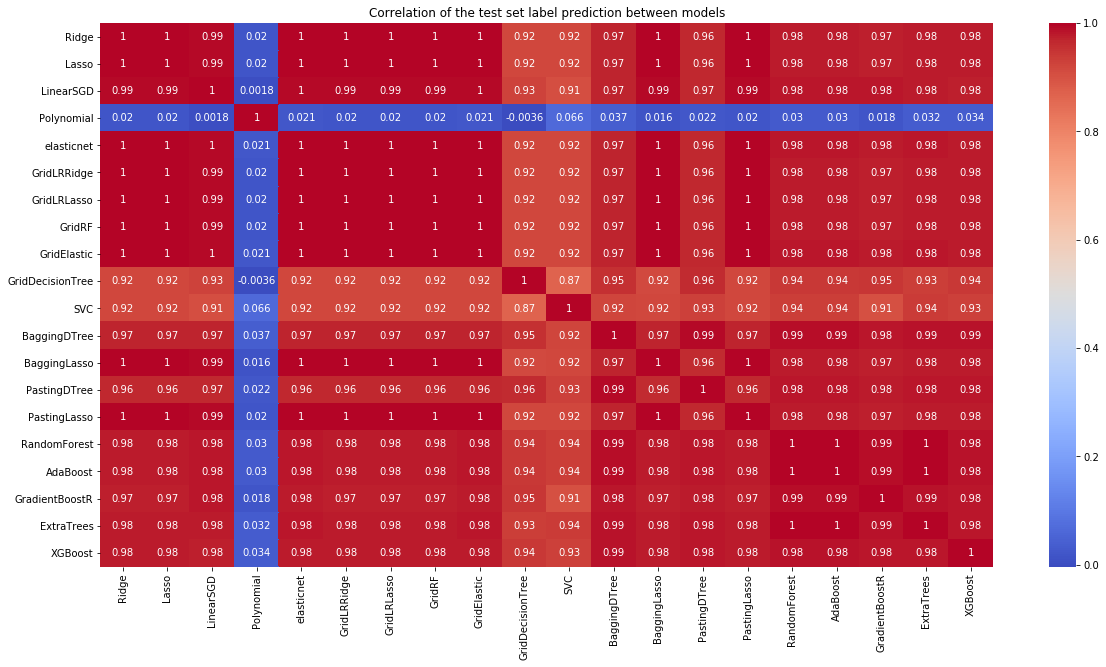

In [100]:
# Plot a heatmap of all correlations for easier visualization
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20,10))
g = sns.heatmap(pred.corr(), annot=True, cmap='coolwarm', ax=ax)
g.set_title('Correlation of the test set label prediction between models')

In [101]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=True)
    return au_corr[0:n]

In [102]:
print("Top Least Correlations")
print(get_top_abs_correlations(pred, 5))

Top Least Correlations
LinearSGD   Polynomial          0.001773
Polynomial  GridDecisionTree    0.003570
            BaggingLasso        0.015869
            GradientBoostR      0.018109
            GridRF              0.019594
dtype: float64


## Stacking

## Voting top 5

In [103]:
from sklearn.ensemble import VotingRegressor

In [104]:
vclf1 = VotingRegressor( estimators=
                              [('XGBoost', xgbr_grid.best_estimator_),
                               ('GradientBoost', gboost.best_estimator_), 
                               ('BaggingLasso', bag_lasso_grid.best_estimator_),
                               ('PastingDTree', bag_lasso_grid.best_estimator_),
                               ('Ridge', grid_ridge.best_estimator_)
                              ] )
vclf1_param = { }
vclf1_grid = GridSearchCV(vclf1, vclf1_param,cv=5, return_train_score=True)
vclf1_grid.fit(X_train,y_train)


C:\Users\nabhs\Anaconda3\envs\buan6341_2020\lib\site-packages\sklearn\ensemble\_bagging.py:1056: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\nabhs\Anaconda3\envs\buan6341_2020\lib\site-packages\sklearn\ensemble\_bagging.py:1056: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\nabhs\Anaconda3\envs\buan6341_2020\lib\site-packages\sklearn\ensemble\_bagging.py:1056: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\nabhs\Anaconda3\envs\buan6341_2020\lib\site-packages\sklearn\ensemble\_bagging.py:1056: UserWarning: Some inputs do not have OOB scores. This probably 

GridSearchCV(cv=5, error_score=nan,
             estimator=VotingRegressor(estimators=[('XGBoost',
                                                    XGBRegressor(base_score=0.5,
                                                                 booster=None,
                                                                 colsample_bylevel=1,
                                                                 colsample_bynode=1,
                                                                 colsample_bytree=1,
                                                                 gamma=0,
                                                                 gpu_id=-1,
                                                                 importance_type='gain',
                                                                 interaction_constraints=None,
                                                                 learning_rate=0.1,
                                                                 ma

In [105]:
# let's get the predictions
x_vclf1_train= vclf1_grid.predict(X_train)
x_vclf1_test = vclf1_grid.predict(X_test)

# check model performance:

print('train mse: {}'.format(mean_squared_error(y_train, x_vclf1_train)))
print('train rmse: {}'.format(sqrt(mean_squared_error(y_train, x_vclf1_train))))
print('train r2: {}'.format(r2_score(y_train, x_vclf1_train)))
print()
print('test mse: {}'.format(mean_squared_error(y_test, x_vclf1_test)))
print('test rmse: {}'.format(sqrt(mean_squared_error(y_test, x_vclf1_test))))
print('test r2: {}'.format(r2_score(y_test, x_vclf1_test)))
print()
print(f'Best Mean Cross Validation Score is {vclf1_grid.best_score_}')
print(f'Best parameters {vclf1_grid.best_params_}')
print(f'Train score is {vclf1_grid.score(X_train,y_train)}')
print(f'Test score is {vclf1_grid.score(X_test,y_test)}')

train mse: 317633603.336003
train rmse: 17822.2782869083
train r2: 0.9491284183151113

test mse: 822879018.3587837
test rmse: 28685.867920611774
test r2: 0.8802582634262037

Best Mean Cross Validation Score is 0.8999858356957512
Best parameters {}
Train score is 0.9491284183151113
Test score is 0.8802582634262037


## Voting Least Correlated 

In [106]:
vclf3 = VotingRegressor(estimators=
                             [('LinearSGD', grid_linearsgd.best_estimator_), 
                               ('Polynomial', grid_poly.best_estimator_), 
                               ('GridDecisionTree', grid_dtree.best_estimator_),
                               ('BaggingLasso', bag_lasso_grid.best_estimator_),
                               ('GradientBoostR', gboost.best_estimator_)
                              ] )
vclf3_param = { }
vclf3_grid = GridSearchCV(vclf3, vclf3_param,cv=5, return_train_score=True)
vclf3_grid.fit(X_train,y_train)

C:\Users\nabhs\Anaconda3\envs\buan6341_2020\lib\site-packages\sklearn\ensemble\_bagging.py:1056: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\nabhs\Anaconda3\envs\buan6341_2020\lib\site-packages\sklearn\ensemble\_bagging.py:1056: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\nabhs\Anaconda3\envs\buan6341_2020\lib\site-packages\sklearn\ensemble\_bagging.py:1056: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\nabhs\Anaconda3\envs\buan6341_2020\lib\site-packages\sklearn\ensemble\_bagging.py:1056: UserWarning: Some inputs do not have OOB scores. This probably 

GridSearchCV(cv=5, error_score=nan,
             estimator=VotingRegressor(estimators=[('LinearSGD',
                                                    Pipeline(memory=None,
                                                             steps=[('scaler',
                                                                     MinMaxScaler(copy=True,
                                                                                  feature_range=(0,
                                                                                                 1))),
                                                                    ('sgd_reg',
                                                                     SGDRegressor(alpha=0.01,
                                                                                  average=False,
                                                                                  early_stopping=False,
                                                                           

In [107]:
# let's get the predictions
x_vclf3_train= vclf3_grid.predict(X_train)
x_vclf3_test = vclf3_grid.predict(X_test)

# check model performance:

print('train mse: {}'.format(mean_squared_error(y_train, x_vclf3_train)))
print('train rmse: {}'.format(sqrt(mean_squared_error(y_train, x_vclf3_train))))
print('train r2: {}'.format(r2_score(y_train, x_vclf3_train)))
print()
print('test mse: {}'.format(mean_squared_error(y_test, x_vclf3_test)))
print('test rmse: {}'.format(sqrt(mean_squared_error(y_test, x_vclf3_test))))
print('test r2: {}'.format(r2_score(y_test, x_vclf3_test)))
print()
print(f'Best Mean Cross Validation Score is {vclf3_grid.best_score_}')
print(f'Best parameters {vclf3_grid.best_params_}')
print(f'Train score is {vclf3_grid.score(X_train,y_train)}')
print(f'Test score is {vclf3_grid.score(X_test,y_test)}')

train mse: 282747004.4125732
train rmse: 16815.08264661739
train r2: 0.954715788316905

test mse: 8.592991133805444e+28
test rmse: 293138041437911.0
test r2: -1.2504142866314648e+19

Best Mean Cross Validation Score is -2.7187395878116203e+20
Best parameters {}
Train score is 0.954715788316905
Test score is -1.2504142866314648e+19


## Stacking Top 5

https://towardsdatascience.com/stacking-made-easy-with-sklearn-e27a0793c92b

In [108]:
from sklearn.ensemble import StackingRegressor

In [109]:
sregf1 = StackingRegressor(estimators=
                             [ ('GradientBoost', gboost.best_estimator_), 
                               ('BaggingLasso', bag_lasso_grid.best_estimator_),
                               ('PastingDTree', bag_lasso_grid.best_estimator_),
                               ('Ridge', grid_ridge.best_estimator_)
                              ] , final_estimator=XGBRegressor())
sregf1_param = {
              'final_estimator__learning_rate' : [0.1],
              'final_estimator__max_depth':[4],
              'final_estimator__min_child_weight':[1],
              'final_estimator__n_estimators':[192],
              'final_estimator__subsample':[0.8],
              'n_jobs':[-1]
             }
sregf1_grid = GridSearchCV(sregf1, sregf1_param,cv=5, return_train_score=True )
sregf1_grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=StackingRegressor(cv=None,
                                         estimators=[('GradientBoost',
                                                      GradientBoostingRegressor(alpha=0.9,
                                                                                ccp_alpha=0.0,
                                                                                criterion='friedman_mse',
                                                                                init=None,
                                                                                learning_rate=0.1,
                                                                                loss='ls',
                                                                                max_depth=5,
                                                                                max_features='log2',
                                                                            

In [110]:
# let's get the predictions
x_sregf1_train= sregf1_grid.predict(X_train)
x_sregf1_test = sregf1_grid.predict(X_test)

# check model performance:

print('train mse: {}'.format(mean_squared_error(y_train, x_sregf1_train)))
print('train rmse: {}'.format(sqrt(mean_squared_error(y_train, x_sregf1_train))))
print('train r2: {}'.format(r2_score(y_train, x_sregf1_train)))
print()
print('test mse: {}'.format(mean_squared_error(y_test, x_sregf1_test)))
print('test rmse: {}'.format(sqrt(mean_squared_error(y_test, x_sregf1_test))))
print('test r2: {}'.format(r2_score(y_test, x_sregf1_test)))
print()
print(f'Best Mean Cross Validation Score is {sregf1_grid.best_score_}')
print(f'Best parameters {sregf1_grid.best_params_}')
print(f'Train score is {sregf1_grid.score(X_train,y_train)}')
print(f'Test score is {sregf1_grid.score(X_test,y_test)}')

train mse: 408279864.3139851
train rmse: 20205.93636320735
train r2: 0.9346106890152514

test mse: 825035315.361602
test rmse: 28723.427987648025
test r2: 0.8799444885675358

Best Mean Cross Validation Score is 0.87774060712915
Best parameters {'final_estimator__learning_rate': 0.1, 'final_estimator__max_depth': 4, 'final_estimator__min_child_weight': 1, 'final_estimator__n_estimators': 192, 'final_estimator__subsample': 0.8, 'n_jobs': -1}
Train score is 0.9346106890152514
Test score is 0.8799444885675358


## Stacking Least Correlated

In [111]:
sregf2 = StackingRegressor(estimators=
                             [('LinearSGD', grid_linearsgd.best_estimator_), 
                               ('Polynomial', grid_poly.best_estimator_), 
                               ('GridDecisionTree', grid_dtree.best_estimator_),
                               ('BaggingLasso', bag_lasso_grid.best_estimator_),
                               ('GradientBoostR', gboost.best_estimator_)
                              ], 
                           final_estimator=XGBRegressor())
sregf2_param = {
                  'final_estimator__learning_rate' : [0.1],
              'final_estimator__max_depth':[4],
              'final_estimator__min_child_weight':[1],
              'final_estimator__n_estimators':[192],
              'final_estimator__subsample':[0.8],
              'n_jobs':[-1]
             }
sregf2_grid = GridSearchCV(sregf2, sregf2_param,cv=5, return_train_score=True)
sregf2_grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=StackingRegressor(cv=None,
                                         estimators=[('LinearSGD',
                                                      Pipeline(memory=None,
                                                               steps=[('scaler',
                                                                       MinMaxScaler(copy=True,
                                                                                    feature_range=(0,
                                                                                                   1))),
                                                                      ('sgd_reg',
                                                                       SGDRegressor(alpha=0.01,
                                                                                    average=False,
                                                                                    early_stopping=False,
     

In [112]:
# let's get the predictions
x_sregf2_train= sregf2_grid.predict(X_train)
x_sregf2_test = sregf2_grid.predict(X_test)

# check model performance:

print('train mse: {}'.format(mean_squared_error(y_train, x_sregf2_train)))
print('train rmse: {}'.format(sqrt(mean_squared_error(y_train, x_sregf2_train))))
print('train r2: {}'.format(r2_score(y_train, x_sregf2_train)))
print()
print('test mse: {}'.format(mean_squared_error(y_test, x_sregf2_test)))
print('test rmse: {}'.format(sqrt(mean_squared_error(y_test, x_sregf2_test))))
print('test r2: {}'.format(r2_score(y_test, x_sregf2_test)))
print()
print(f'Best Mean Cross Validation Score is {sregf2_grid.best_score_}')
print(f'Best parameters {sregf2_grid.best_params_}')
print(f'Train score is {sregf2_grid.score(X_train,y_train)}')
print(f'Test score is {sregf2_grid.score(X_test,y_test)}')

train mse: 355270884.9509614
train rmse: 18848.630850832677
train r2: 0.9431005043099072

test mse: 685715224.4673892
test rmse: 26186.1647529261
test r2: 0.9002177356076231

Best Mean Cross Validation Score is 0.8665230017810973
Best parameters {'final_estimator__learning_rate': 0.1, 'final_estimator__max_depth': 4, 'final_estimator__min_child_weight': 1, 'final_estimator__n_estimators': 192, 'final_estimator__subsample': 0.8, 'n_jobs': -1}
Train score is 0.9431005043099072
Test score is 0.9002177356076231
